# Visualization 2#

## Introduction ## 

Visualization is the term that describes graph generation of the data set, and normally includes multiple graph types. We've covered some basic graphs, now let's look at some others. 

## Objectives of this Lesson ##

    1. Start your Jupyter Notebook
    2. Load the data
    3. Stacked bar
    4. Circular bar
    5. Histograms
    6. Boxplots
    7. Pie charts
    8. Heat map
    9. Bubble plots
      
    ***
    
    
## Initial setup ##

After creating your own Jupyter Notebook, save it with the format 'LastName_Mod2_Lsn3' for upload.



Setup: Type the code, exactly as shown, in the box in Jupyter Notebook, save it and Run it. We will loading the data from the previous lesson. We are using a new library - *matplotlib* - for the first time, and, since we're going to use it alot, we import a special function of it and give it it's own name.  

The data we will be using _temporal.csv_ tracks the searches for data science terms - the three tracked are *data science*, *machine learning*, and *deep learning*.

__Setup:__

In [1]:
#Setup
import matplotlib.pyplot as plt  # for generating plots
import matplotlib
import pandas as pd     # import the pandas library to read a .csv file
import numpy as np      # use py for numpy from now on
# this command tells Jupyter Notebook to plot in this space
%matplotlib inline  

df = pd.read_csv('temporal.csv')   # read in the data to df

df.head(10)   # first 10 data rows

,Mes,data science,machine learning,deep learning,categorical,Unnamed: 5
0,1/1/2004,12,18,4,1,NaN
1,2/1/2004,12,21,2,1,NaN
2,3/1/2004,9,21,2,1,NaN
3,4/1/2004,10,16,4,1,NaN
4,5/1/2004,7,14,3,1,NaN
5,6/1/2004,9,17,3,1,NaN
6,7/1/2004,9,16,3,1,NaN
7,8/1/2004,7,14,3,1,NaN
8,9/1/2004,10,17,4,1,NaN
9,10/1/2004,8,17,4,1,NaN


So, from looking at this, the data starts in January 2004, and reports, by month, the number of searches for each term.  Now let's look at some of the basic stats of the data.

__Example 1:__ Type the following into your Jupyter notebook.

In [2]:
#Example 1
df.describe ()  # see how the data is distributed - maxs, mins, means

,data science,machine learning,deep learning,categorical,Unnamed: 5
count,194.000000,194.000000,194.000000,194.000000,0.0
mean,20.953608,27.396907,24.231959,0.257732,NaN
std,23.951006,28.091490,34.476887,0.438517,NaN
min,4.000000,7.000000,1.000000,0.000000,NaN
25%,6.000000,9.000000,2.000000,0.000000,NaN
50%,8.000000,13.000000,3.000000,0.000000,NaN
75%,26.750000,31.500000,34.000000,1.000000,NaN
max,100.000000,100.000000,100.000000,1.000000,NaN


There are 194 rows in this data, which varies all over the place because the standard deviation is larger than the mean.

Let's plot all three columns on the same graph.

__Example 2:__

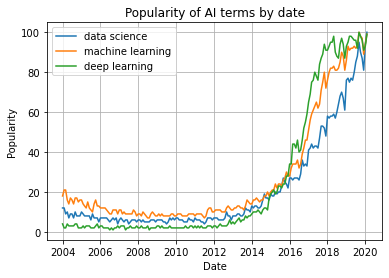

In [3]:
#Example 2
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])     # only display years, not months
#We apply the style to the visualization
df.head().style.format(format_dict)

plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

Much easier to read!  It has a legend and the grid makes it easier to get the numbers off of the 
plot. Nothing new here... but now...

## Stacked Bar ##
Now I want to look at the totals.  We've done bar charts, which are good at looking at comparing individual values. A stacked bar chart uses the same data, but puts the individual values into a single column, which allows you to compare totals.

__Example 3:__

,Mes,data science,machine learning,deep learning,categorical,Unnamed: 5
0,01-2004,$12.00,1800.00%,4,1,nan
1,02-2004,$12.00,2100.00%,2,1,nan
2,03-2004,$9.00,2100.00%,2,1,nan
3,04-2004,$10.00,1600.00%,4,1,nan
4,05-2004,$7.00,1400.00%,3,1,nan


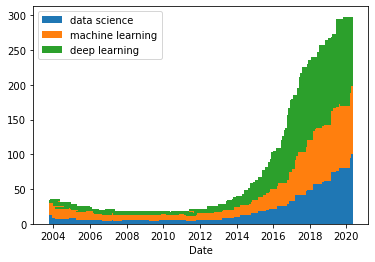

In [4]:
#Example 3
p1 = plt.bar(df['Mes'], df['data science'], len(df) )
p2 = plt.bar(df['Mes'], df['machine learning'],len(df),bottom=df['data science'])
p3 = plt.bar(df['Mes'], df['deep learning'],len(df), bottom=df['data science']+df['machine learning'] )

plt.legend((p1[0], p2[0], p3[0]), ('data science','machine learning', 'deep learning'))
plt.xlabel('Date')
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
df['Mes'] = pd.to_datetime(df['Mes']) 
df.head().style.format(format_dict)

__Question 1:__ Using the stacked bar chart, analyze the search history?  Is one more popular than another?  Be specific as to timing and quantity, as much as you can.

***
Circular bar charts are plotted with polar coordinates, so we have to use the _polar_ parameter of subplot() function of _matplotlib_.  

__Example 4:__


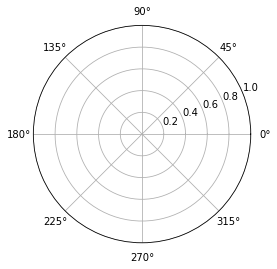

In [5]:
# Example 4
# Initialize plot with polar coordinates
plt.subplot(111, polar = True)

Now let's add a bar to this figure, using the normal bar() function. The same parameters must be provided, but they have different meanings in polar coordinates.

- 𝑥 : angle of the center of the section we're adding

- ℎ𝑒𝑖𝑔ℎ𝑡  and  𝑏𝑜𝑡𝑡𝑜𝑚  are a bit like the ylim values in that they control the thickness of the section.

__Example 5:__

<BarContainer object of 1 artists>

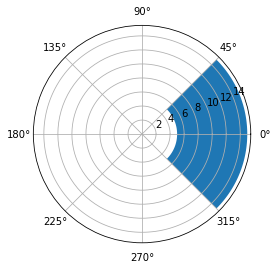

In [6]:
#Example 5
#add a bar to the polar coordinates
plt.subplot(111,polar=True)
plt.bar(x=0,height=10, width = np.pi/2, bottom = 5)
# angles are in radians - 180 degrees is pi radians

The dataset should have 2 columns - the first is the name and the second is the value. Let's build a dataset.

__Example 6:__

In [7]:
# Example 6
df_circle = pd.DataFrame(
       {
           'Name':['item '+ str(i) for i in list(range(1,51))],
           'Value':np.random.randint(low=10, high = 100, size = 50)
       })

#show first 5 rows
df_circle.head(5)

,Name,Value
0,item 1,83
1,item 2,32
2,item 3,87
3,item 4,22
4,item 5,98


Lets plot these 50 values.

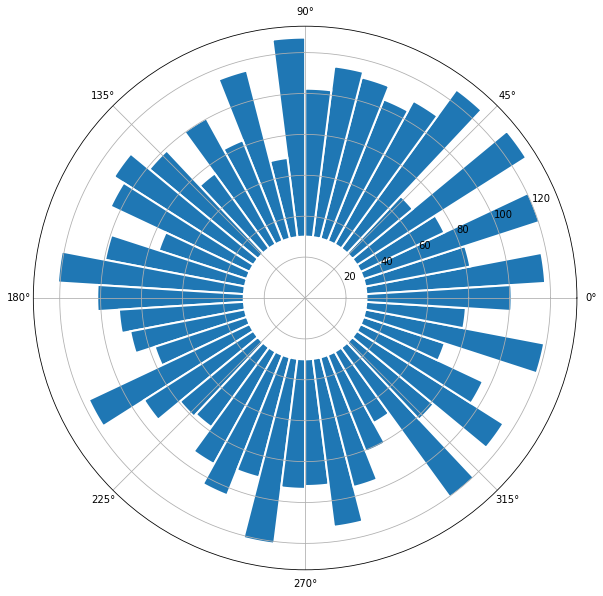

In [8]:
# Example 7
# A very basic circular barchart

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111,polar=True)

# remove grid
plt.axis='off'

# set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max in the dataset
max = df_circle['Value'].max()

# Now scale heights: and convert to new coordinates
# The smallest value (0) will be converted to the lowerLimit (10) and max will be 100
slope = (max-lowerLimit)/max
heights = slope * df_circle.Value + lowerLimit

# compute width of each bar - need to cover all 360 degrees (2*pi)
width = 2*np.pi /len(df_circle.index)

# compute the angle each bar is centered on
indexes = list(range(1, len(df_circle.index)+1))
angles = [element * width for element in indexes]
angles

# draw the bars
bars = ax.bar(
     x = angles,
     height = heights,
     width = width,
     bottom = lowerLimit,
     linewidth=2,
     edgecolor = "white")


Cool, but needs labels! As long as you remember your trig, they are straightforward to add. Using the calculations already done..

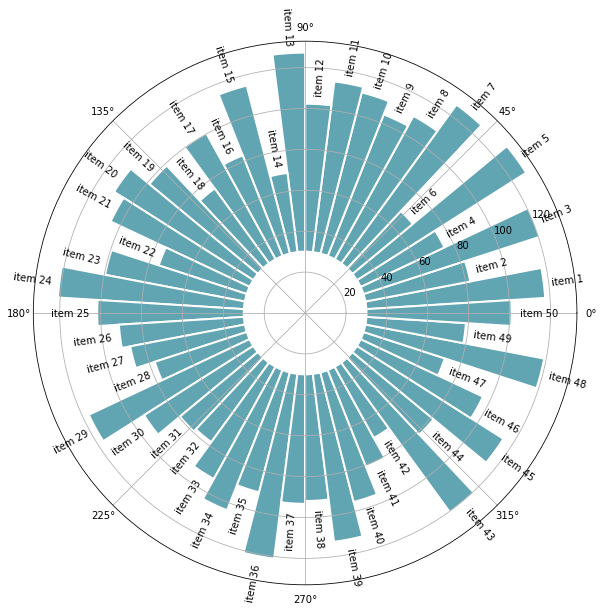

In [9]:
#Example 8
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111,polar=True)
plt.axis='off'

# draw the bars
bars = ax.bar(
     x = angles,
     height = heights,
     width = width,
     bottom = lowerLimit,
     linewidth=2,
     edgecolor = "white",
     color = "#61a4b2"
)
# a little space between bar and label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles,heights,df_circle["Name"]):
    #Labels are rotated - rotations must be specified in degrees
    rotation = np.rad2deg(angle)
    
    # Flip some upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation+180
    else:
        alignment="left"
        
    # Add the labels
    ax.text(
       x=angle,
       y=lowerLimit+bar.get_height() + labelPadding,
       s=label,
       ha=alignment,
       va = 'center',
       rotation = rotation,
       rotation_mode='anchor')
    

Very cool - if you ever need a circular barchart, this is how you do it!

***

__Question 2__ What considerations would you use to organize something like this?

***

## Histogram## 

A histogram is a frequency diagram, again with no sense of timing. It sorts the data into 'bins' - groupings of amounts - and plots the frequency of those amounts. An easy to understand example is for student grades. Traditionally, 90-100 is an A, 80-89 is a B, and so on. The 'bins' in this example are the 90-100, the 80-89, and so on. The frequency would be the number of students who earned each grade.

As a scientist, you have the option of determining the number of bins - each being equal sized. In this case, we're going to use 15 bins, and plot the number of searches.


__Example 9:__

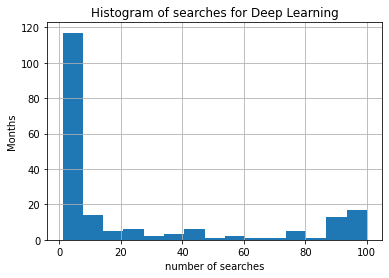

In [10]:
#Example 9
plt.hist(df['deep learning'], bins=15)
plt.xlabel('number of searches')
plt.ylabel('Months')
plt.title('Histogram of searches for Deep Learning')
plt.grid(True)

From this histogram, which we could call bimodal, there are over 100 months where there were very 
few (less than 6) searches (20/3 bins), and almost 20 months where there were almost 100 searches. 
Again, we don't know WHEN each value is, but it does tell us that most of our data has small values.



## Boxplots ##
Boxplots were first developed in the late 60s and are great at looking how your data is distributed.

They map the quartiles.  We will use a Tukey boxplot, which limits the length of the whiskers to 1.5 times the Inter Quartile Range (IQR), which is 75% value - 25% value.

Let's refresh ourselves what those quartiles are.


In [11]:
#Example 10
df.describe ()  # see how the data is distributed - maxs, mins, means

,data science,machine learning,deep learning,categorical,Unnamed: 5
count,194.000000,194.000000,194.000000,194.000000,0.0
mean,20.953608,27.396907,24.231959,0.257732,NaN
std,23.951006,28.091490,34.476887,0.438517,NaN
min,4.000000,7.000000,1.000000,0.000000,NaN
25%,6.000000,9.000000,2.000000,0.000000,NaN
50%,8.000000,13.000000,3.000000,0.000000,NaN
75%,26.750000,31.500000,34.000000,1.000000,NaN
max,100.000000,100.000000,100.000000,1.000000,NaN


A boxplot pretty much flips the 'describe' output, as the min is on the bottom and the max is on the top.  The bottom of the whisker, if there are no outliers, is the minimum value.  The bottom of the box is the 25% value, the line in the middle of the box the median, the top of the box the 75% value, and the top of the whisker is the 100%, if there are no outliers.  In a Tukey boxplot, outliers are defined as greater than 1.5 times the IQR, as presented above.  

__Example 11:__

Text(0, 0.5, 'Number of searches')

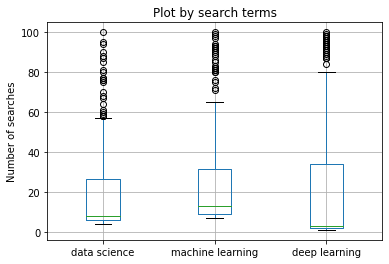

In [12]:
#Example 11
boxplot = df.boxplot(column=['data science','machine learning','deep learning'])
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

As you can see from this boxplot, the medians are very small, so most of your data is very small, but let's get even more information about the middle of the data by using a notched boxplot.  A notch is centered around the median, and indicates the middle 5% of the data.  What is interesting about these boxplots is that the largest data is very spread out.  The median, as shown by the green line, is towards the bottom of the plot, so most of the data is there.  The outliers, those individual dots above the whisker, are values that are outside the 1.5 X IQR range. 


Text(0, 0.5, 'Number of searches')

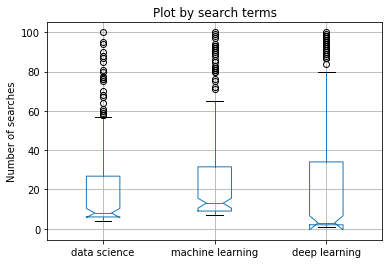

In [13]:
#Example 12
boxplot = df.boxplot(column=['data science','machine learning','deep learning'], notch=True)
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

Boxplots can also go horizontal. The notch, being the middle 5%, really shows that half the data, the lower half, is tightly grouped. 

__Example 13:__

Text(0, 0.5, 'Number of searches')

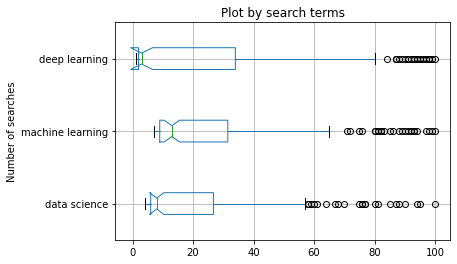

In [14]:
# Example 13
boxplot = df.boxplot(column=['data science','machine learning','deep learning'], notch=True, vert=False)
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

## Pie Chart ##

A simple, but power chart that is used to represent part of a whole is a Pie chart.

Unfortunately, none of the data we've used so far works well for this, so we'll need to create a data file.

__Example 14:__

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

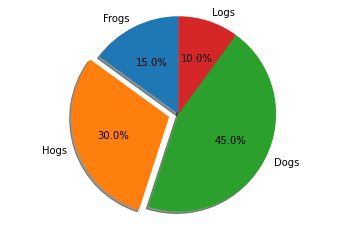

In [15]:
# Example 14
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]  # these are the percentages/parts of the whole
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)   # the pie starts at the top and goes counterclockwise
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Heat map##
A heatmap shows data that depends on two different variables as a color coded image, where the color displays the range of values.

__Example 15:__


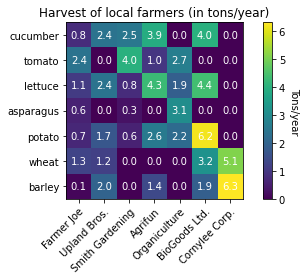

In [16]:
#Example 15
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")

# Create colorbar-scale
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Tons/year', rotation=-90, va="bottom")

fig.tight_layout()

Lots of good data to interpret from a heat map.  

***
__Question 3:__  A heat map is very dense with data, so you need to consider how to structure it.
    For the farming data, one way to structure the y-axis would be to group the crop by time of year, 
    so all the winter crops are together, all the spring, and so on.  What other considerations could 
    you use to organize this graph?
***

## Bubble plot ##

A bubble plot builds on a scatter plot, but scales the size of the bubbles to reflect value, we need to add a _size_ argument for the size of the data points.

We need to add the size of the bubble and future colors.

__Example 16:__


Text(0.5, 1.0, 'Bubble Scatter plot with Matplotlib')

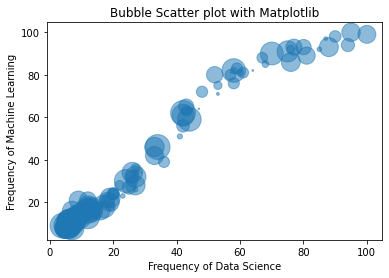

In [17]:
# Example 16
#creating 194 data points for color and size of bubble
N=194
colors = np.random.rand(N)
area = (25*np.random.rand(N))**2

df_bubble = pd.DataFrame({
    'Mes':df['Mes'],
    'data science':df['data science'],
    'machine learning':df['machine learning'],
    'deep learning':df['deep learning'],
    'Colors': colors,
    "bubble_size": area})

plt.scatter('data science','machine learning',
           s = 'bubble_size',
           alpha=0.5,
           data=df_bubble)
plt.xlabel("Frequency of Data Science")
plt.ylabel("Frequency of Machine Learning")
plt.title("Bubble Scatter plot with Matplotlib")

The default color is blue, and we can add/change transparency by using _alpha=0.5_.  To get a colored bubble, we need to add one more parameter to the plot.

__Example 17:__

Text(0.5, 1.0, 'Bubble Scatter plot with Colors using Matplotlib')

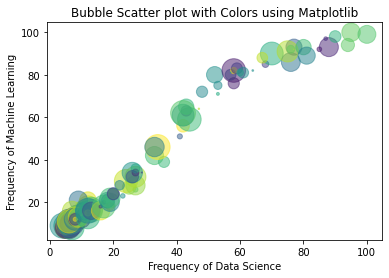

In [18]:
# Example 17
plt.scatter('data science','machine learning',
           s = 'bubble_size',c='Colors',
           alpha = 0.5,data = df_bubble)
plt.xlabel("Frequency of Data Science")
plt.ylabel("Frequency of Machine Learning")
plt.title("Bubble Scatter plot with Colors using Matplotlib")

## Handy References ##

This is a down and dirty look at what you can do with Python and matplotlib.  There are lots of other libraries with visualization tools, such as seaborn.

The Python website is a great place to start - https://www.python.org/

matplotlib Documentation:  https://matplotlib.org/3.1.1/index.html (check out the examples)

Stackoverflow.com:  https://stackoverflow.com their platform has helped lots of scriptwriters with their code.

Towards Data Science: https://towardsdatascience.com - platform where people write short, practical articles on data science.
